In [1]:
import pandas as pd
import numpy as np
# by default, pandas only shows the beginning and end of a large dataframe
# You can choose how many rows and columns to show.
# If you want to see all of the rows, set the respective value to None
pd.options.display.max_rows = 100 
pd.options.display.max_columns = 50

In [2]:
# URL for data hosted online
cases_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv' 
cases_df = pd.read_csv(cases_url, index_col='date') # create a dataframe from a csv, set the column titled "Index" as the row labels

In [3]:
# URL for data hosted online
areas_url = 'https://raw.githubusercontent.com/bwsi-remote-sensing-2021/group3_pandasproject/main/stateareas2010.csv' 
areas_df = pd.read_csv(areas_url, index_col='state') # create a dataframe from a csv, set the column titled "Index" as the row labels

In [4]:
cases_df

,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
...,...,...,...,...
2021-07-11,Virginia,51,682673,11450
2021-07-11,Washington,53,457092,6050
2021-07-11,West Virginia,54,164465,2908


In [8]:
cases_df = cases_df.sort_values('date', ascending=False)
cases_df = cases_df[(cases_df.state != 'Virgin Islands') & (cases_df.state != 'Northern Mariana Islands')\
                    & (cases_df.state != 'Guam')]
cases_df = cases_df.head(52)
cases_df

,state,fips,cases,deaths
date,,,,
2021-07-11,Wyoming,56,62966,751
2021-07-11,Montana,30,114348,1673
2021-07-11,Mississippi,28,324057,7439
2021-07-11,Minnesota,27,606390,7715
2021-07-11,Michigan,26,1000337,21045
2021-07-11,Massachusetts,25,710830,18011
2021-07-11,Maryland,24,463403,9762
2021-07-11,Maine,23,69219,862
2021-07-11,Louisiana,22,487558,10781


In [9]:
areas_with_cases = cases_df.merge(areas_df, how='left',
                               left_on='state', right_index=True)
areas_with_cases = areas_with_cases.sort_values('cases',ascending=False)
areas_with_cases.set_index('state', inplace=True)
areas_with_cases

,fips,cases,deaths,square miles,square kilometers
state,,,,,
California,6,3834396,63485,163695,423967
Texas,48,3011021,52772,268596,695662
Florida,12,2361360,38157,65758,170312
New York,36,2118565,53151,54555,141297
Illinois,17,1399525,25755,57914,149995
Pennsylvania,42,1218649,27790,46054,119280
Georgia,13,1114789,20791,59425,153910
Ohio,39,1114267,20380,44826,116098
New Jersey,34,1026071,26505,8723,22591


In [32]:
# higher value means greater cases per square mile
ratio = areas_with_cases['cases'] / areas_with_cases['square miles']
ratio.sort_values()
ratio

state
California               23.424026
Texas                    11.210223
Florida                  35.909851
New York                 38.833562
Illinois                 24.165573
Pennsylvania             26.461306
Georgia                  18.759596
Ohio                     24.857605
New Jersey              117.628224
North Carolina           18.925584
Michigan                 10.343249
Arizona                   7.908053
Tennessee                20.332052
Indiana                  20.879242
Massachusetts            67.351715
Virginia                 15.959626
Wisconsin                10.364221
Missouri                  9.299554
Minnesota                 6.975131
South Carolina           18.704497
Colorado                  5.434809
Alabama                  10.580027
Louisiana                 9.308450
Kentucky                 11.574193
Maryland                 37.353136
Oklahoma                  6.590681
Washington                6.411007
Utah                      4.935946
Iowa          

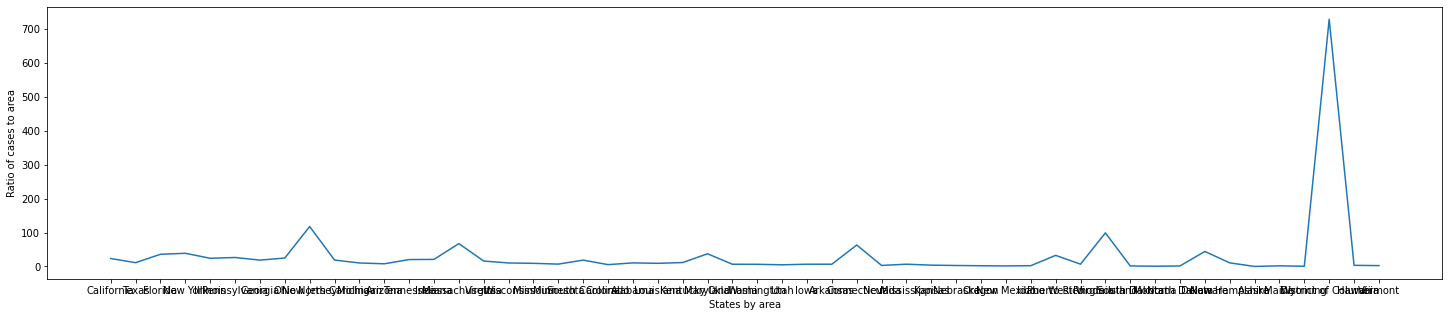

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.xlabel('States by area')
plt.ylabel('Ratio of cases to area')
plt.plot(ratio)